<a href="https://colab.research.google.com/github/fadeevie/recurrent_nn/blob/main/%D0%A4%D0%B0%D0%B4%D0%B5%D0%B5%D0%B2%D0%98%D0%95_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель работы**

Целью данной лабораторной работы является изучение принципов работы рекуррентных нейронных сетей и применение их для решения задачи классификации текстов.

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

Загрузка и анализ данных набора данных IMDB

Мы будем использовать встроенную функцию загрузки данных набора данных IMDB из библиотеки Keras. Эта функция загружает набор данных и разбивает его на обучающую и тестовую выборки.

При загрузке данных мы можем указать параметры num_words, которые задают максимальное количество слов, которые мы хотим использовать в нашей модели. В данном случае мы ограничим количество слов 10 000 (параметр можно изменить, если необходимо).

Для каждого отзыва имеется метка класса (1 - положительный отзыв, 0 - отрицательный отзыв).

In [ ]:
# настройки загрузки данных
number_of_words = 10000 # ограничение на количество слов
max_len = 200 # максимальная длина отзыва в словах

# загрузка данных и разделение на обучающую и тестовую выборки
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)

17464789/17464789 [==============================] - 0s 0us/step


В данном датасете содержатся отзывы на фильмы и их оценки: положительный или отрицательный. Каждый отзыв представлен в виде последовательности индексов слов, где каждое слово соответствует определенному индексу.

In [ ]:
# ограничение длины отзывов
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

print('Форма обучающей выборки:', X_train.shape)
print('Форма тестовой выборки:', X_test.shape)

Форма обучающей выборки: (25000, 200)
Форма тестовой выборки: (25000, 200)


**Моделирование**

> *Рекуррентные нейронные сети* — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки. В отличие от многослойных перцептронов, рекуррентные сети могут использовать свою внутреннюю память для обработки последовательностей произвольной длины. Поэтому сети RNN применимы в таких задачах, где нечто целостное разбито на части, например: распознавание рукописного текста или распознавание речи. Было предложено много различных архитектурных решений для рекуррентных сетей от простых до сложных. В последнее время наибольшее распространение получили сеть с долговременной и кратковременной памятью (LSTM) и управляемый рекуррентный блок (GRU).


> Существует много разновидностей, решений и конструктивных элементов рекуррентных нейронных сетей.
Трудность рекуррентной сети заключается в том, что если учитывать каждый шаг времени, то становится необходимым для каждого шага времени создавать свой слой нейронов, что вызывает серьёзные вычислительные сложности. Кроме того, многослойные реализации оказываются вычислительно неустойчивыми, так как в них, как правило, исчезают или зашкаливают веса. Если ограничить расчёт фиксированным временным окном, то полученные модели не будут отражать долгосрочных трендов. Различные подходы пытаются усовершенствовать модель исторической памяти и механизм запоминания и забывания.




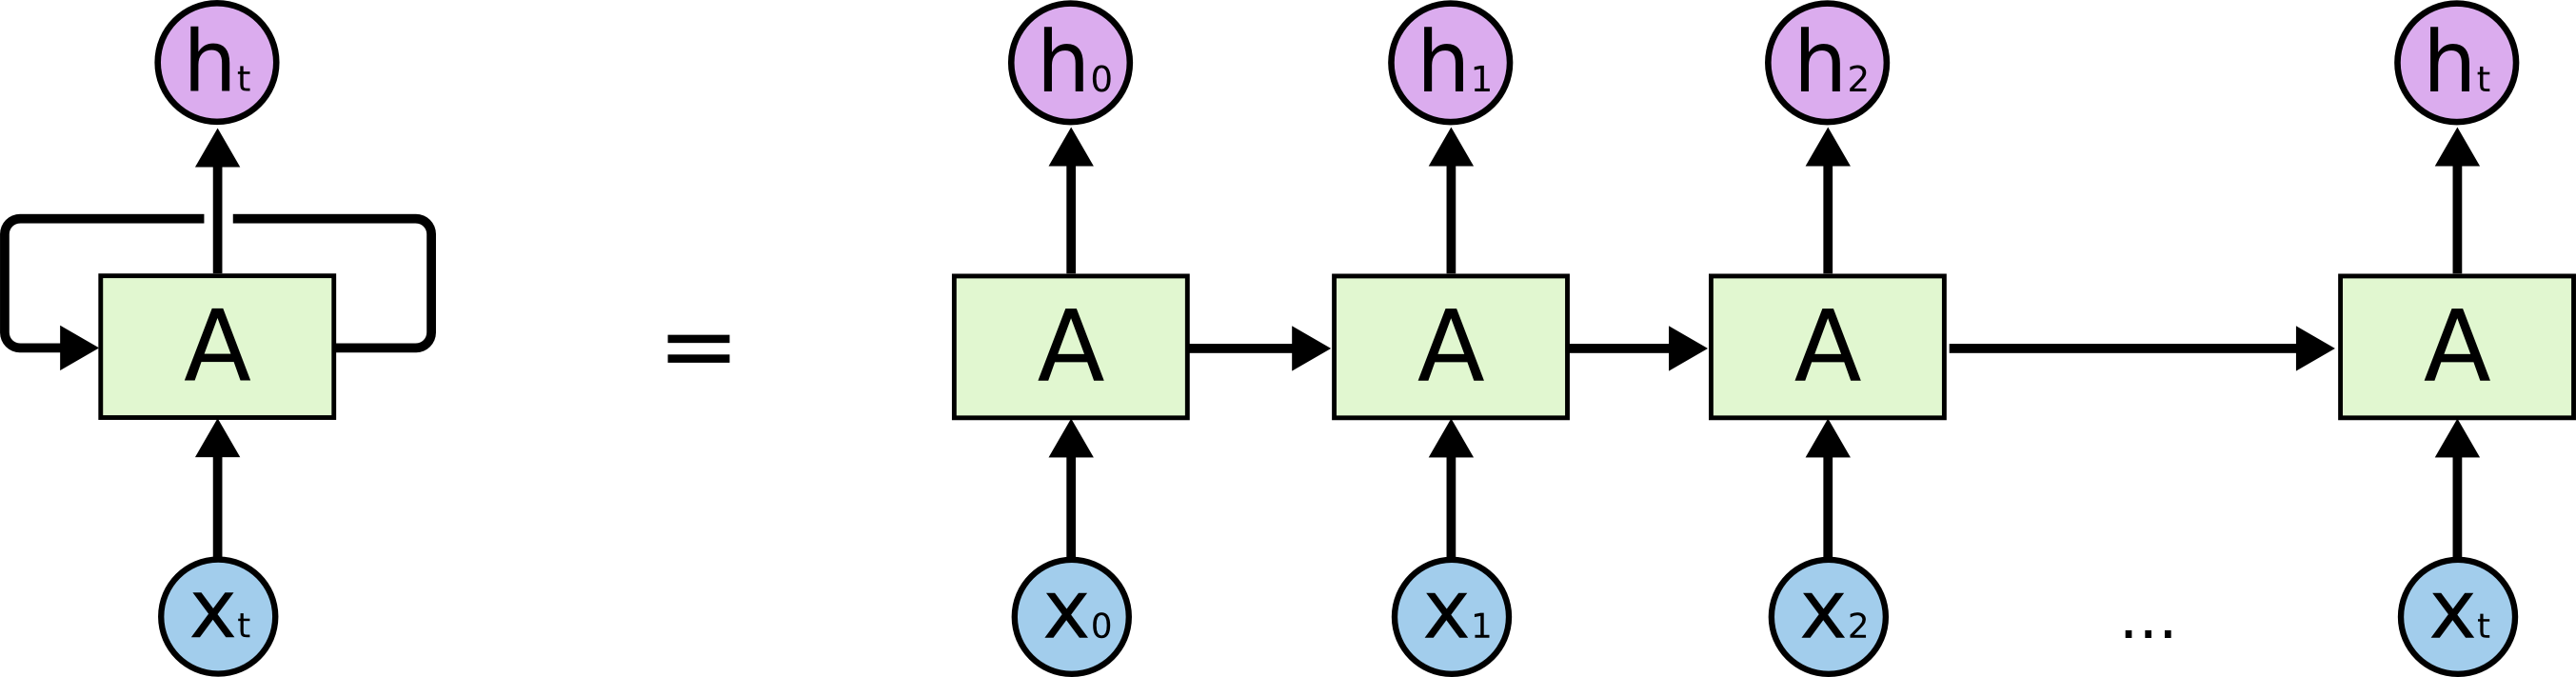

**SimpleRNN**

> SimpleRNN - Эта базовая архитектура. Сеть строится из узлов, каждый из которых соединён со всеми другими узлами. У каждого нейрона порог активации меняется со временем и является вещественным числом. Каждое соединение имеет переменный вещественный вес. Узлы разделяются на входные, выходные и скрытые.





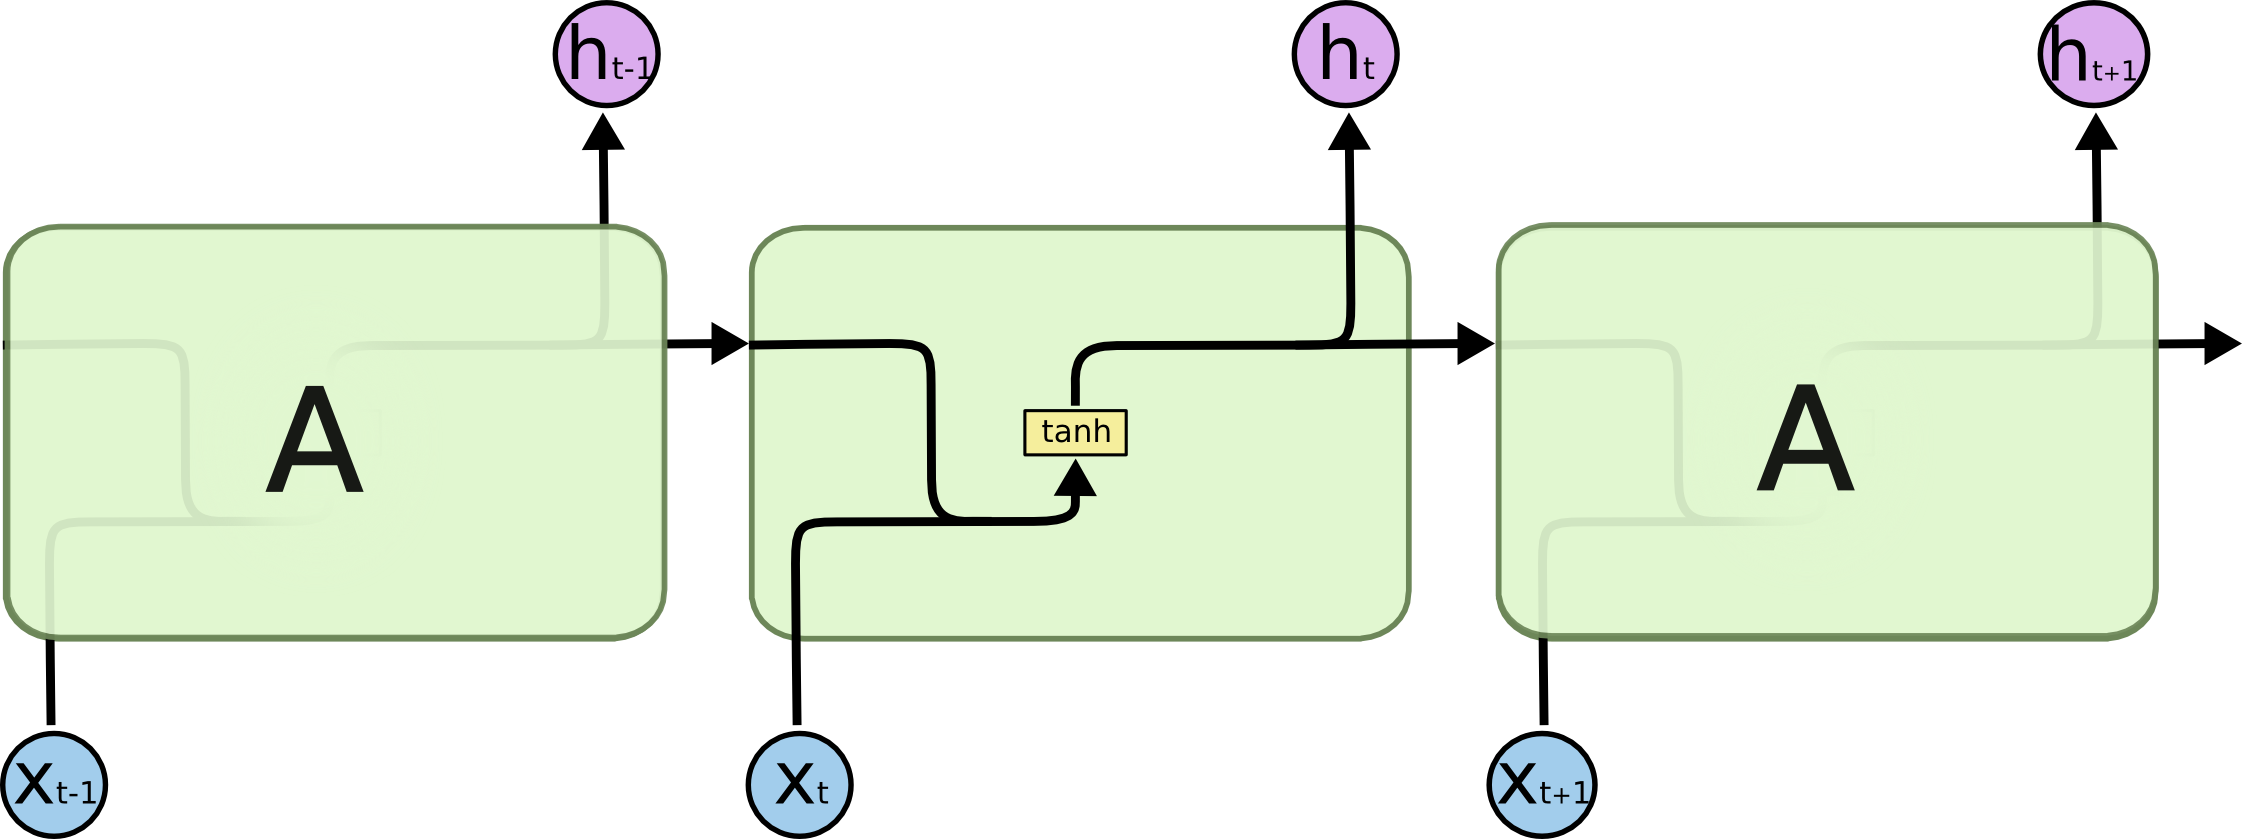

In [ ]:
embedding_dim=128

model_srnn = Sequential([
    Embedding(number_of_words, embedding_dim, input_length=max_len),
    SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_srnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
print(model_srnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1293013 (4.93 MB)
Trainable params: 1293013 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history_srnn = model_srnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=24, epochs=12)
loss_srnn, accuracy_srnn = model_srnn.evaluate(X_test, y_test, verbose='False')
print(f'Loss srnn: {loss_srnn}')
print(f'Accuracy srnn: {accuracy_srnn}')

Epoch 1/12
1042/1042 [==============================] - 118s 111ms/step - loss: 0.6830 - accuracy: 0.5462 - val_loss: 0.6716 - val_accuracy: 0.5623
Epoch 2/12
1042/1042 [==============================] - 114s 109ms/step - loss: 0.5927 - accuracy: 0.6786 - val_loss: 0.8187 - val_accuracy: 0.6084
Epoch 3/12
1042/1042 [==============================] - 115s 110ms/step - loss: 0.5549 - accuracy: 0.7133 - val_loss: 0.5550 - val_accuracy: 0.7060
Epoch 4/12
1042/1042 [==============================] - 107s 102ms/step - loss: 0.5160 - accuracy: 0.7369 - val_loss: 0.5799 - val_accuracy: 0.6779
Epoch 5/12
1042/1042 [==============================] - 106s 101ms/step - loss: 0.5110 - accuracy: 0.7397 - val_loss: 0.6167 - val_accuracy: 0.6478
Epoch 6/12
1042/1042 [==============================] - 106s 102ms/step - loss: 0.4884 - accuracy: 0.7696 - val_loss: 0.5237 - val_accuracy: 0.7516
Epoch 7/12
1042/1042 [==============================] - 113s 109ms/step - loss: 0.4597 - accuracy: 0.7850 - val_

**LSTM**


> Сеть с долговременной и кратковременной памятью представляет собой систему глубинного обучения, при реализации которой удалось обойти проблему исчезновения или зашкаливания градиентов в процессе обучения методом обратного распространения ошибки. Сеть LSTM обычно модерируется с помощью рекуррентных вентилей, которые называются вентили (gates) «забывания». Ошибки распространяются назад по времени через потенциально неограниченное количество виртуальных слоёв. Таким образом происходит обучение в LSTM, при этом сохраняя память о тысячах и даже миллионах временных интервалов в прошлом.




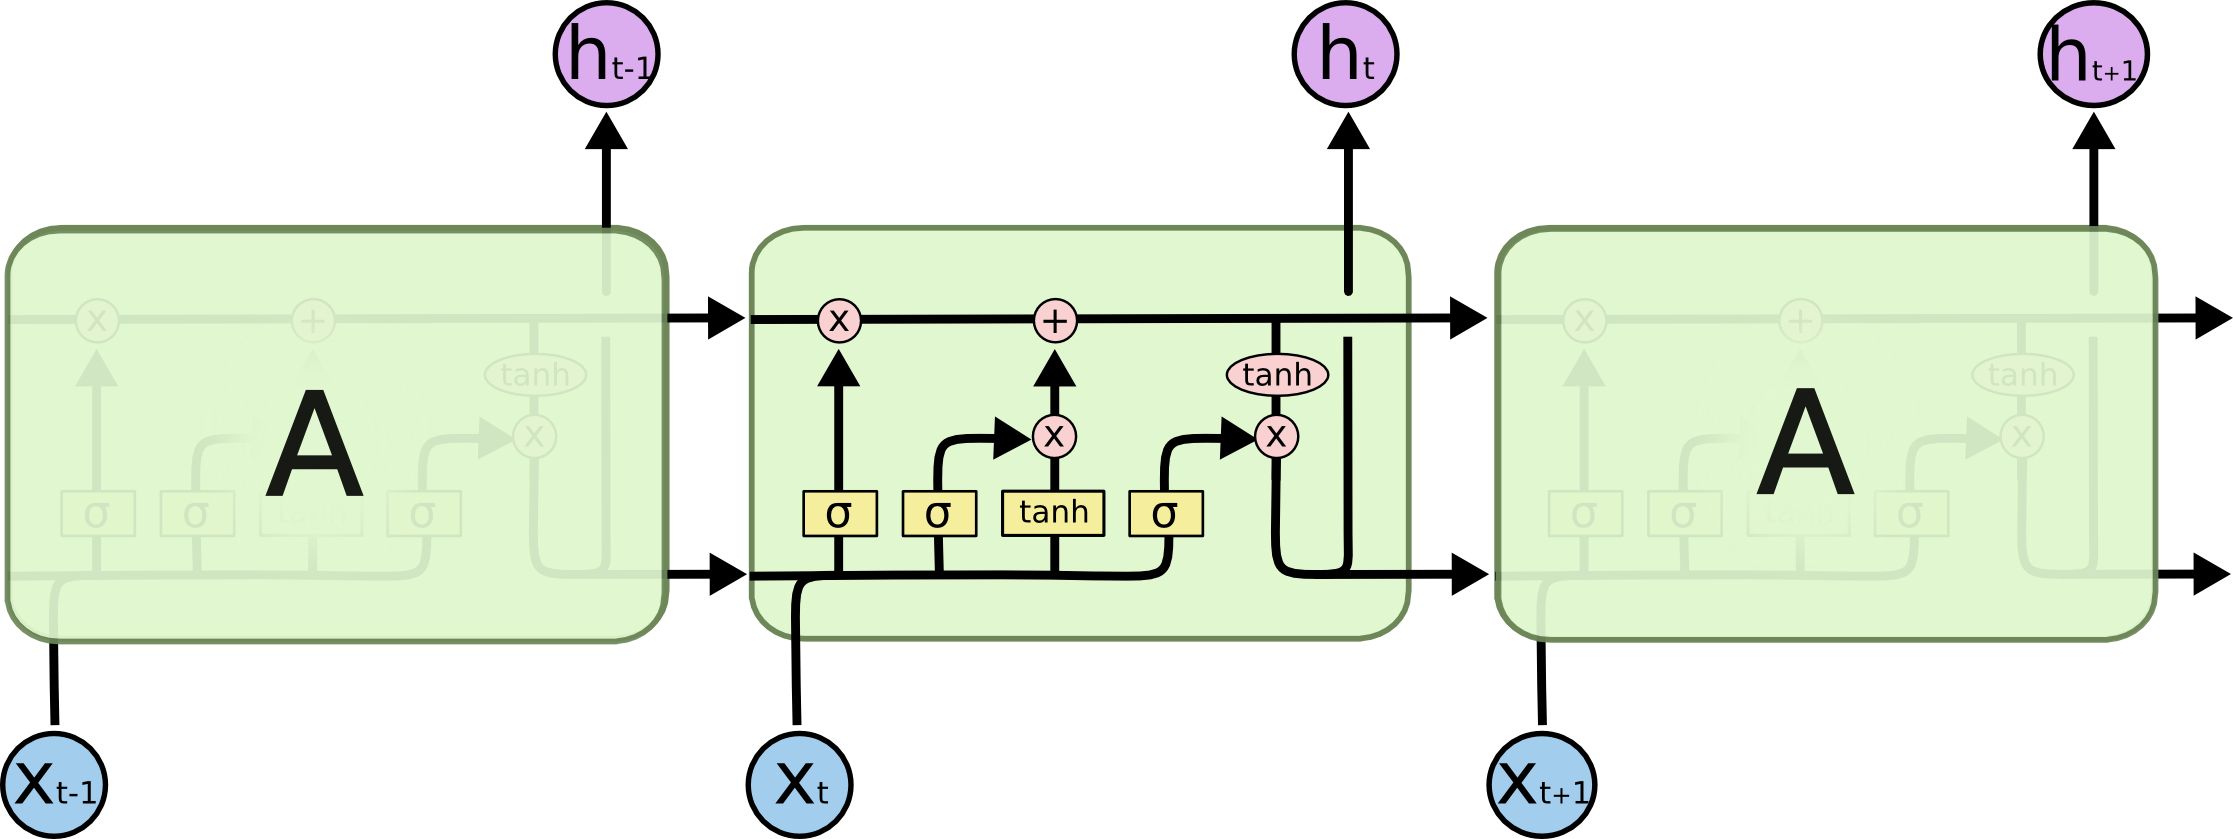

In [ ]:
embedding_dim = 128

model_lstm = Sequential([
    Embedding(number_of_words, embedding_dim, input_length=max_len),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1330069 (5.07 MB)
Trainable params: 1330069 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=24, epochs=12)
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose='False')
print(f'Loss LSTM: {loss_lstm}')
print(f'Accuracy LSTM: {accuracy_lstm}')

Epoch 1/12
1042/1042 [==============================] - 345s 327ms/step - loss: 0.4353 - accuracy: 0.7954 - val_loss: 0.3521 - val_accuracy: 0.8606
Epoch 2/12
1042/1042 [==============================] - 341s 327ms/step - loss: 0.2550 - accuracy: 0.9009 - val_loss: 0.3640 - val_accuracy: 0.8548
Epoch 3/12
1042/1042 [==============================] - 340s 326ms/step - loss: 0.1858 - accuracy: 0.9306 - val_loss: 0.3536 - val_accuracy: 0.8722
Epoch 4/12
1042/1042 [==============================] - 339s 326ms/step - loss: 0.1485 - accuracy: 0.9458 - val_loss: 0.3799 - val_accuracy: 0.8518
Epoch 5/12
1042/1042 [==============================] - 335s 321ms/step - loss: 0.1136 - accuracy: 0.9594 - val_loss: 0.4519 - val_accuracy: 0.8671
Epoch 6/12
1042/1042 [==============================] - 339s 325ms/step - loss: 0.0805 - accuracy: 0.9726 - val_loss: 0.4939 - val_accuracy: 0.8642
Epoch 7/12
1042/1042 [==============================] - 340s 326ms/step - loss: 0.0646 - accuracy: 0.9784 - val_

**GRU**

> GRU — это модифицированная, упрощенная версия LSTM, в которой долговременная и кратковременная память объединяется в так называемое Скрытое состояние (Hidden State). У него есть только скрытое состояние, которое может сочетать в себе как долговременную, так и кратковременную память. Фильтры «забывания» и входа объединяют в один фильтр «обновления» (англ. update gate). Этот фильтр определяет сколько информации сохранить от последнего состояния, и сколько информации получить от предыдущего слоя. Кроме того, состояние ячейки объединяется со скрытым состоянием, есть и другие небольшие изменения. Фильтр сброса состояния (англ. reset gate) работает почти так же, как фильтр забывания, но расположен немного иначе. На следующие слои отправляется полная информация о состоянии, выходного фильтра нет. В большинстве случаем GRU работают так же, как LSTM, самое значимое отличие в том, что GRU немного быстрее и проще в эксплуатации, однако обладает немного меньшими выразительными возможностями. В результате модели проще, чем LSTM и их популярность неуклонно возрастает. Эффективность при решении задач моделирования музыкальных и речевых сигналов сопоставима с использованием долгой краткосрочной памяти.



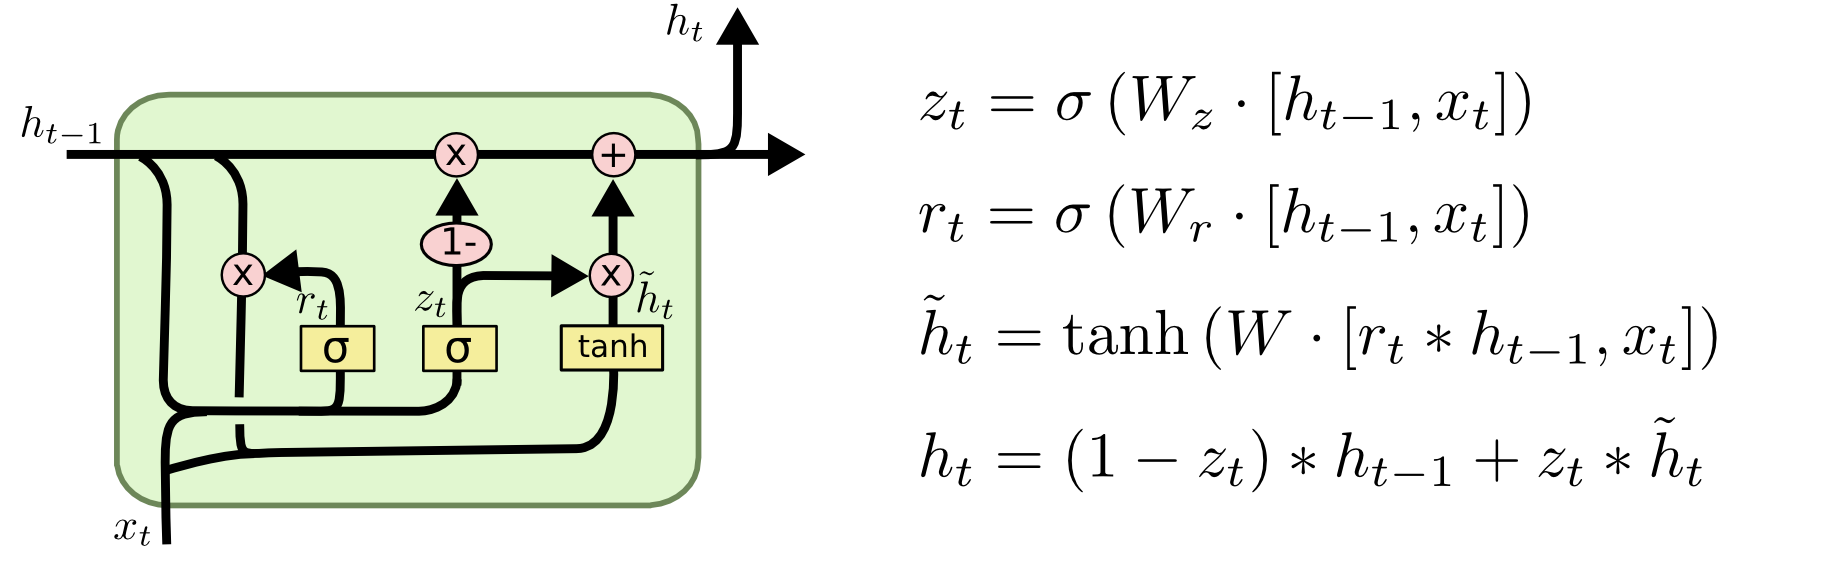

In [ ]:
embedding_dim=128

model_gru = Sequential([
    Embedding(number_of_words, embedding_dim, input_length=max_len),
    GRU(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
print(model_gru.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1317909 (5.03 MB)
Trainable params: 1317909 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=24, epochs=12)
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test)
print(f'Loss GRU: {loss_gru}')
print(f'Accuracy GRU: {accuracy_gru}')

Epoch 1/12
1042/1042 [==============================] - 330s 314ms/step - loss: 0.4338 - accuracy: 0.7917 - val_loss: 0.3329 - val_accuracy: 0.8610
Epoch 2/12
1042/1042 [==============================] - 313s 301ms/step - loss: 0.2379 - accuracy: 0.9084 - val_loss: 0.2888 - val_accuracy: 0.8838
Epoch 3/12
1042/1042 [==============================] - 325s 312ms/step - loss: 0.1597 - accuracy: 0.9402 - val_loss: 0.3091 - val_accuracy: 0.8791
Epoch 4/12
1042/1042 [==============================] - 326s 313ms/step - loss: 0.1061 - accuracy: 0.9635 - val_loss: 0.3650 - val_accuracy: 0.8686
Epoch 5/12
1042/1042 [==============================] - 326s 313ms/step - loss: 0.0706 - accuracy: 0.9761 - val_loss: 0.4343 - val_accuracy: 0.8651
Epoch 6/12
1042/1042 [==============================] - 326s 313ms/step - loss: 0.0486 - accuracy: 0.9840 - val_loss: 0.5371 - val_accuracy: 0.8667
Epoch 7/12
1042/1042 [==============================] - 326s 313ms/step - loss: 0.0318 - accuracy: 0.9891 - val_

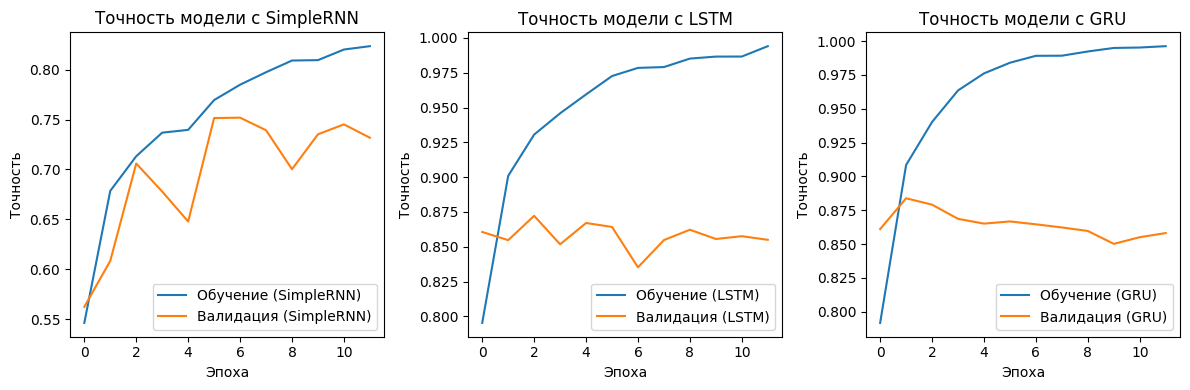

In [ ]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.plot(history_srnn.history['accuracy'], label='Обучение (SimpleRNN)')
plt.plot(history_srnn.history['val_accuracy'], label='Валидация (SimpleRNN)')
plt.title('Точность модели с SimpleRNN')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_lstm.history['accuracy'], label='Обучение (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Валидация (LSTM)')
plt.title('Точность модели с LSTM')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_gru.history['accuracy'], label='Обучение (GRU)')
plt.plot(history_gru.history['val_accuracy'], label='Валидация (GRU)')
plt.title('Точность модели с GRU')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()


plt.tight_layout()
plt.show()

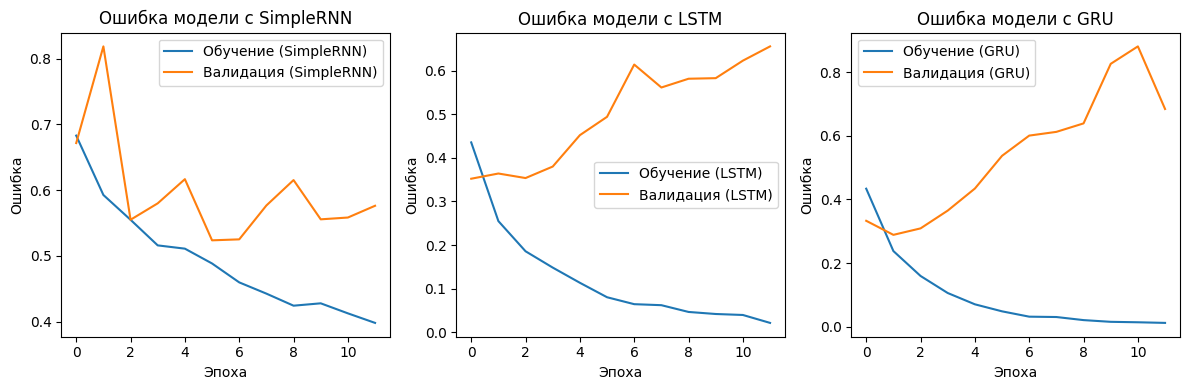

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history_srnn.history['loss'], label='Обучение (SimpleRNN)')
plt.plot(history_srnn.history['val_loss'], label='Валидация (SimpleRNN)')
plt.title('Ошибка модели с SimpleRNN')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_lstm.history['loss'], label='Обучение (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Валидация (LSTM)')
plt.title('Ошибка модели с LSTM')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_gru.history['loss'], label='Обучение (GRU)')
plt.plot(history_gru.history['val_loss'], label='Валидация (GRU)')
plt.title('Ошибка модели с GRU')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()


plt.tight_layout()
plt.show()